In [51]:
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv('datasets/insurance_data.csv')

In [53]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [54]:
df.sample(3)

,age,bought_insurance
26,23,0
13,29,0
15,55,1


In [55]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [56]:
x = df.age

In [57]:
print(x)

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64


In [58]:
y = df.bought_insurance

In [59]:
print(y)

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64


In [60]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Insurance Data')

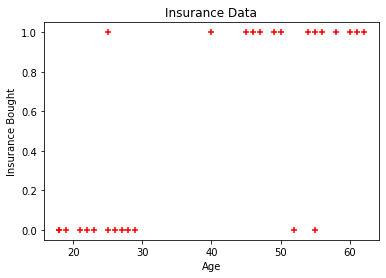

In [63]:
plt.scatter(x, y, marker = '+', color = 'red')
plt.xlabel('Age')
plt.ylabel('Insurance Bought')
plt.title('Insurance Data')

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size = 0.2)

In [66]:
x_train.size

21

In [67]:
df.index.size

27

In [68]:
x_test.size

6

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()

In [71]:
model.fit(x_train, y_train)

LogisticRegression()

In [72]:
x_test

,age
1,25
14,49
22,40
17,58
20,21
3,52


In [73]:
x_train

,age
7,60
24,50
23,45
12,27
13,29
18,19
9,61
5,56
15,55
25,54


In [74]:
y_predicted = model.predict(x_test)

In [75]:
y_predicted

array([0, 1, 1, 1, 0, 1], dtype=int64)

In [76]:
model.score(x_test, y_test)

0.8333333333333334

In [77]:
# m
model.coef_

array([[0.14616579]])

In [78]:
# c
model.intercept_

array([-5.51694352])

In [79]:
import math

In [80]:
def sigmoid(y):
    return 1 / (1 + math.exp(-y))

In [81]:
def prediction_function(age):
    y = model.coef_ * age + model.intercept_
    result = sigmoid(y)
    return result

In [82]:
age = 35
prediction_function(age)

0.4010382577182202

In [83]:
age = 59
prediction_function(age)

0.9571739280088263

In [84]:
x_test

,age
1,25
14,49
22,40
17,58
20,21
3,52


In [85]:
x_test_list = x_test.age.tolist()
print(x_test_list)

[25, 49, 40, 58, 21, 52]


In [86]:
ans_list = []
for x in x_test_list:
    result = prediction_function(x)
    if result < 0.5:
        ans_list.append(0)
    else:
        ans_list.append(1)

        

In [87]:
print(ans_list)

[0, 1, 1, 1, 0, 1]


In [88]:
y_test

1     0
14    1
22    1
17    1
20    0
3     0
Name: bought_insurance, dtype: int64

In [89]:
y_test_list = y_test.tolist()

In [90]:
print(y_test_list)

[0, 1, 1, 1, 0, 0]


In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(ans_list, y_test_list)

In [93]:
cm

array([[2, 0],
       [1, 3]], dtype=int64)

In [94]:
import seaborn as sb

Text(15.0, 0.5, 'Actual')

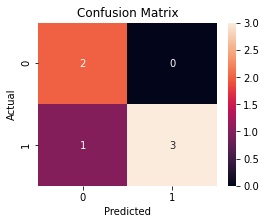

In [95]:
plt.figure(figsize = (4, 3))
sb.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')